In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#### read in scc data ####
df = pd.read_excel('/net/fs11/d0/emfreese/social_cost_carbon/scc_2013_tsd_output_july_2015_revision.xlsx', sheet_name = 1, header = [0,1,2,3,4], index_col = 0)
df = df.droplevel('/net/fs11/d0/emfreese/social_cost_carbon/scc_2013_tsd_output_july_2015_revision', axis=1)
df = df.transpose() #data is in 2007$/metric ton

#### read in emissions data ####
gmodel_egrid = {}
for name in ['normal', 'nonuc']:
    gmodel_egrid[name] = xr.open_dataset(f'./data/gmodel_egrid_emissions_{name}_ds.nc')


In [6]:
#### CO2 values ####

normal_CO2 = ((gmodel_egrid['normal']['PLCO2RTA']*gmodel_egrid['normal']['annual_modelgeneration']).sum()*.001).values #metric tons
nonuc_CO2 = ((gmodel_egrid['nonuc']['PLCO2RTA']*gmodel_egrid['nonuc']['annual_modelgeneration']).sum()*.001).values #metric tons
dif_CO2 = nonuc_CO2 - normal_CO2

In [7]:
#### datasets for normal and no nuclear cost of CO2 emissions ####
df_nonuc = (df*nonuc_CO2)
df_normal = (df*normal_CO2)
df_dif = (df*dif_CO2)

<ipython-input-16-bb3526ae3c1f>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = df_dif.droplevel('Model').droplevel('Scenario').loc[(2010, scc)].droplevel('Rate').values*1e-9 #drop the levels for model, scenario type, choose 2010 levels


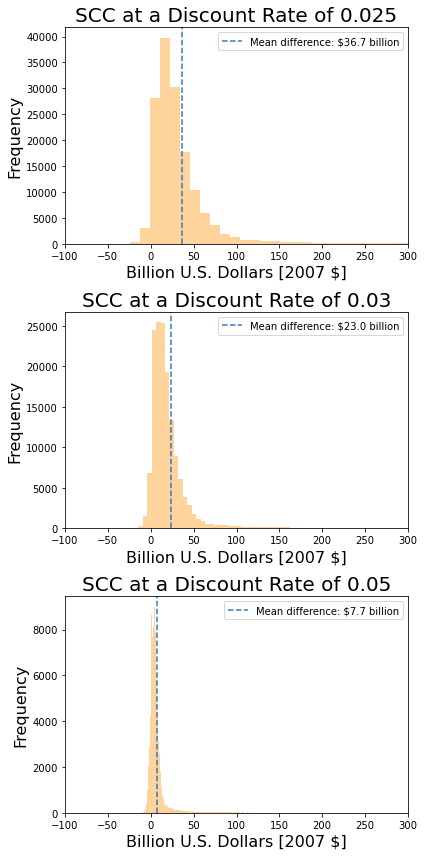

In [16]:
#### plot our SCC by discount rate ####
colors = ["tangerine", "windows blue"]
fig, axes = plt.subplots(3,1, figsize=[6,12],)
for idx_c, scc in enumerate([0.025,0.03,0.05]):
    ax = axes[idx_c]
    x = df_dif.droplevel('Model').droplevel('Scenario').loc[(2010, scc)].droplevel('Rate').values*1e-9 #drop the levels for model, scenario type, choose 2010 levels
    mean = x.mean()
    sns.distplot(x, 
                 ax = ax,
                 rug=False, kde = False, bins = 1000, 
                 color = sns.xkcd_palette(colors)[0],
                );
    ax.axvline(mean, color=sns.xkcd_palette(colors)[1], linestyle='--', label = f'Mean difference: ${np.round(mean,1)} billion')
    ax.legend()
    ax.set_title(f'SCC at a Discount Rate of {scc}', fontsize = 20)
    ax.set_xlabel('Billion U.S. Dollars [2007 $]', fontsize = 16)
    ax.set_ylabel('Frequency', fontsize = 16)
    ax.set_xlim(-.1e3,.3e3)
plt.tight_layout()